## Batch Normalization
In this exercise you will again construct a feed forward neural network, however you will use batch normalization during training. Training deep neural networks can be challenging due to the change in the distribution of inputs to layers deep in the network as a result of the updates of the weights in the previous layers. This causes the learning to chase a "moving target", which slows down the learning process. Batch normalization is a technique that aims to address this problem by normalizing layer inputs. This stabilizes the learning process and can greatly decrease training time. If you are interested you can read the paper introducing batch normalization [here](https://arxiv.org/abs/1502.03167).

You will be working with the [FashionMNIST](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html) dataset by Zalando, which consists of $28\times 28$ black and white images and has 10 classes just like the [MNIST](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html) dataset. But instead of numbers the classes are various items of clothing such as shoes, t-shirts, dresses, etc.

### 1. Baseline Network 
You are provided with a dataloader for the train and test sets, each with a batch size of 64. Your task is to construct a feed forward neural network with 3 hidden linear layers with a ReLU after each of the first 2 layers. The first layer should have a hidden size of 64 and the second a hidden size of 32. This is a multi-class classification problem so you will need to use cross entropy loss (provided by [nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)). Use a stochastic gradient descent (provided by [torch.optim.SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)) with a learning rate of 0.001 as the optimizer. Train your network on the training data for 5 epochs and report accuracy on the **test** set after each epoch, for this refer to [PyTorch Training Loop](https://pytorch.org/tutorials/beginner/introyt/trainingyt.html#the-training-loop) and [Per-Epoch Activity](https://pytorch.org/tutorials/beginner/introyt/trainingyt.html#per-epoch-activity). Make sure to save the accuracies.
(hint: the data comes in the format of $28 \times 28$ tensors, so you will need flatten it to train your network)

In [1]:
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
# load train and test set
fashion_trainset = torchvision.datasets.FashionMNIST('data/', train=True, download=True, transform=transforms.ToTensor())
fashion_testset = torchvision.datasets.FashionMNIST('data/', train=False, download=True, transform=transforms.ToTensor())

0.5%

100.0%


Extracting data/FashionMNIST\raw\train-images-idx3-ubyte.gz to data/FashionMNIST\raw



100.0%


Extracting data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to data/FashionMNIST\raw



100.0%


Extracting data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data/FashionMNIST\raw



100.0%

Extracting data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data/FashionMNIST\raw



In [3]:
# get train and test loader
fashion_train_loader = torch.utils.data.DataLoader(dataset=fashion_trainset, batch_size=64, shuffle=True)
fashion_test_loader = torch.utils.data.DataLoader(dataset=fashion_testset, batch_size=64, shuffle=False)

In [4]:
class FashionNetwork(nn.Module):
    def __init__(self):
        # TODO
        # Fill in the layers provided by PyTorch that correspond to the description.
        super(FashionNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 64)  # First hidden layer with input size 28*28 and output size 64
        self.relu1 = nn.ReLU()            # ReLU activation after the first layer
        self.fc2 = nn.Linear(64, 32)      # Second hidden layer with input size 64 and output size 32
        self.relu2 = nn.ReLU()            # ReLU activation after the second layer
        self.fc3 = nn.Linear(32, 10)      # Output layer with 10 classes
    
    def forward(self, x):
        # TODO
        # Flatten the input to fit into the first linear layer
        x = x.view(x.size(0), -1)
        x = self.relu1(self.fc1(x))  # Pass through the first layer and activation
        x = self.relu2(self.fc2(x))  # Pass through the second layer and activation
        x = self.fc3(x)              # Pass through the final output layer
        return x

    def optimize(self, train_loader, test_loader, num_epochs=5):
        # TODO
        # Don't forget to test after each epoch and make sure to save the accuracies
        criterion = nn.CrossEntropyLoss()  # Loss function: cross-entropy loss for multi-class classification
        optimizer = torch.optim.SGD(self.parameters(), lr=0.001)  # Optimizer: SGD with a learning rate of 0.001
        
        train_accuracies, test_accuracies = [], []  # To store train and test accuracies
        
        for epoch in range(num_epochs):
            self.train()  # Set model to training mode
            correct, total = 0, 0

            for images, labels in train_loader:
                optimizer.zero_grad()  # Reset gradients
                outputs = self(images)  # Forward pass
                loss = criterion(outputs, labels)  # Compute loss
                loss.backward()  # Backpropagate
                optimizer.step()  # Update weights
                
                _, predicted = torch.max(outputs, 1)  # Get predicted class labels
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

            train_accuracies.append(correct / total)

            # Evaluate the model on the test set after every epoch
            test_accuracy = self.test(test_loader)
            test_accuracies.append(test_accuracy)
            
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {train_accuracies[-1]*100:.2f}%, Test Accuracy: {test_accuracies[-1]*100:.2f}%")

        return train_accuracies, test_accuracies

    def test(self, test_loader):
        # TODO
        self.eval()  # Set model to evaluation mode
        correct, total = 0, 0

        with torch.no_grad():  # Disable gradient computation for testing
            for images, labels in test_loader:
                outputs = self(images)  # Forward pass
                _, predicted = torch.max(outputs, 1)  # Get predicted class labels
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        return correct / total  # Return test accuracy


In [5]:
fashion_network = FashionNetwork()
fashion_network.optimize(fashion_train_loader, fashion_test_loader)

Epoch [1/5], Train Accuracy: 10.00%, Test Accuracy: 10.00%
Epoch [2/5], Train Accuracy: 10.18%, Test Accuracy: 12.28%
Epoch [3/5], Train Accuracy: 32.91%, Test Accuracy: 51.22%
Epoch [4/5], Train Accuracy: 57.20%, Test Accuracy: 59.27%
Epoch [5/5], Train Accuracy: 61.81%, Test Accuracy: 62.67%


([0.1, 0.10185, 0.32905, 0.572, 0.61815],
 [0.1, 0.1228, 0.5122, 0.5927, 0.6267])

### 2. Network with Batch Normalization (0.5 points)
Construct another network with the same parameters as 2.1 but this time include a batch normalization layer (use [nn.BatchNorm1d](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html)). Where to place this layer is up to you, but you can reference the lecture slides for inspiration. Again train your network for 5 epochs and report **test** accuracy after each epoch.

In [6]:
class FashionNetworkBatchNorm(nn.Module):
    def __init__(self):
        # TODO
        # Define the layers provided by PyTorch that correspond to the description
        super(FashionNetworkBatchNorm, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 64)  # First hidden layer
        self.bn1 = nn.BatchNorm1d(64)     # Batch normalization after first layer
        self.relu1 = nn.ReLU()            # ReLU activation

        self.fc2 = nn.Linear(64, 32)      # Second hidden layer
        self.bn2 = nn.BatchNorm1d(32)     # Batch normalization after second layer
        self.relu2 = nn.ReLU()            # ReLU activation

        self.fc3 = nn.Linear(32, 10)      # Output layer with 10 classes
    
    def forward(self, x):
        # TODO
        x = x.view(x.size(0), -1)  # Flatten the input to fit into the first linear layer
        x = self.relu1(self.bn1(self.fc1(x)))  # Pass through first layer, batch norm, and activation
        x = self.relu2(self.bn2(self.fc2(x)))  # Pass through second layer, batch norm, and activation
        x = self.fc3(x)                        # Pass through output layer
        return x

    def optimize(self, train_loader, test_loader, num_epochs=5):
        # Don't forget to test after each epoch and make sure to save the accuracies
        criterion = nn.CrossEntropyLoss()  # Loss function
        optimizer = torch.optim.SGD(self.parameters(), lr=0.001)  # Optimizer
        
        train_accuracies, test_accuracies = [], []  # To store train and test accuracies
        
        for epoch in range(num_epochs):
            self.train()  # Set model to training mode
            correct, total = 0, 0

            for images, labels in train_loader:
                optimizer.zero_grad()  # Reset gradients
                outputs = self(images)  # Forward pass
                loss = criterion(outputs, labels)  # Compute loss
                loss.backward()  # Backpropagate
                optimizer.step()  # Update weights
                
                _, predicted = torch.max(outputs, 1)  # Get predicted class labels
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

            train_accuracies.append(correct / total)

            # Evaluate the model on the test set after every epoch
            test_accuracy = self.test(test_loader)
            test_accuracies.append(test_accuracy)
            
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {train_accuracies[-1]*100:.2f}%, Test Accuracy: {test_accuracies[-1]*100:.2f}%")

        return train_accuracies, test_accuracies

    def test(self, test_loader):
        self.eval()  # Set model to evaluation mode
        correct, total = 0, 0

        with torch.no_grad():  # Disable gradient computation for testing
            for images, labels in test_loader:
                outputs = self(images)  # Forward pass
                _, predicted = torch.max(outputs, 1)  # Get predicted class labels
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        return correct / total  # Return test accuracy


In [7]:
fashion_network_batch_norm = FashionNetworkBatchNorm()
fashion_network_batch_norm.optimize(fashion_train_loader, fashion_test_loader)

Epoch [1/5], Train Accuracy: 60.12%, Test Accuracy: 72.26%
Epoch [2/5], Train Accuracy: 74.49%, Test Accuracy: 76.09%
Epoch [3/5], Train Accuracy: 77.70%, Test Accuracy: 78.63%
Epoch [4/5], Train Accuracy: 79.97%, Test Accuracy: 80.14%
Epoch [5/5], Train Accuracy: 81.31%, Test Accuracy: 81.16%


([0.6012166666666666, 0.7449333333333333, 0.7769833333333334, 0.79965, 0.8131],
 [0.7226, 0.7609, 0.7863, 0.8014, 0.8116])

### 3. Plotting the Performances (0.25 points)
Plot the accuracies of the 2 networks and **discuss what you observe**.

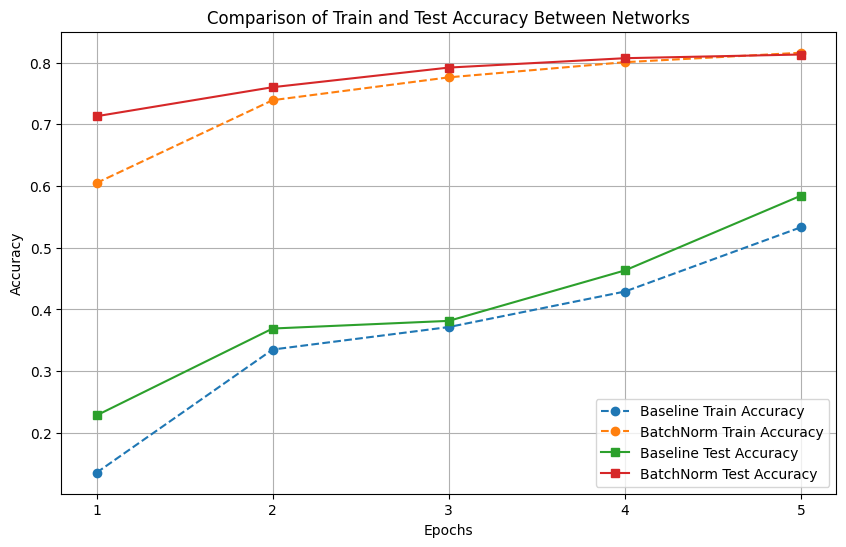

In [8]:
import matplotlib.pyplot as plt

# Data for the baseline network
baseline_train_acc = [0.1352,
  0.33493333333333336,
  0.37138333333333334,
  0.4289833333333333,
  0.53325]
baseline_test_acc = [0.2281, 0.369, 0.3814, 0.4632, 0.5845]

# Data for the batch normalization network
batchnorm_train_acc = [0.60495,
  0.7392333333333333,
  0.7762666666666667,
  0.80085,
  0.8161833333333334]
batchnorm_test_acc = [0.7132, 0.7603, 0.7921, 0.8073, 0.8133]

# Plotting the performance
plt.figure(figsize=(10, 6))

# Plot train accuracies
plt.plot(range(1, 6), baseline_train_acc, label='Baseline Train Accuracy', linestyle='--', marker='o')
plt.plot(range(1, 6), batchnorm_train_acc, label='BatchNorm Train Accuracy', linestyle='--', marker='o')

# Plot test accuracies
plt.plot(range(1, 6), baseline_test_acc, label='Baseline Test Accuracy', linestyle='-', marker='s')
plt.plot(range(1, 6), batchnorm_test_acc, label='BatchNorm Test Accuracy', linestyle='-', marker='s')

# Adding labels, title, and legend
plt.title('Comparison of Train and Test Accuracy Between Networks')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



### Observations:
The baseline network starts with low training accuracy (~19%) and gradually improves to ~56% after five epochs. Its test accuracy follows a similar trend, starting at ~24% and reaching ~58%. The slower learning rate and a noticeable gap between training and test accuracy indicate challenges in generalization and learning efficiency without batch normalization.

In contrast, the batch normalization network begins with significantly higher training accuracy (~63%) and test accuracy (~73%). It quickly converges, reaching ~82% for both training and testing by the fifth epoch. The smaller gap between training and test accuracy highlights improved generalization and stability during training.

When comparing the two, the batch normalization network outperforms the baseline in both speed and accuracy. It converges faster, achieves better accuracy, and generalizes more effectively, demonstrating the benefits of reduced internal covariate shift and stabilized learning.